In [1]:
!git clone https://github.com/radhikasoni/stock-prediction.git

Cloning into 'stock-prediction'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 236 (delta 65), reused 21 (delta 21), pack-reused 143 (from 1)
Receiving objects: 100% (236/236), 364.93 KiB | 8.69 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [2]:
cd /content/stock-prediction

/content/stock-prediction


In [3]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [4]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=d834f659896651ff9ab3e46cbac59e3dd89b17af42089d6c0c5f0fd18b07cad9
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


## LSTM Network - Prediction (model training)



In [5]:
import os
import warnings
import secrets
import pandas as pd
import argparse
from datetime import datetime, timedelta

from stock_prediction_class import StockPrediction
from stock_prediction_lstm import LongShortTermMemory
from stock_prediction_numpy import StockData
from stock_prediction_plotter import Plotter
from stock_prediction_deep_learning import train_LSTM_network
from tensorflow.keras.callbacks import EarlyStopping

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or '3' to suppress all messages

# Suppress other warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

End Date: 2025-01-10


[*********************100%***********************]  1 of 1 completed


mean: [0.53720315 0.54089665 0.53975064 0.53800846 0.06342074 0.50444037
 0.54791168 0.55018551 0.4331991  0.44287254 0.55530259 0.53833163
 0.48345702 0.49434981]
max 1.0
min 0.0
Std dev: [0.26405836 0.26310568 0.26423754 0.26418744 0.07687569 0.17612003
 0.27496224 0.28418015 0.15109649 0.16530571 0.26515496 0.2749093
 0.30568631 0.30928501]
plotting Data and Histogram


/content/stock-prediction/stock_prediction_plotter.py:25: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training_data.hist(ax=ax)


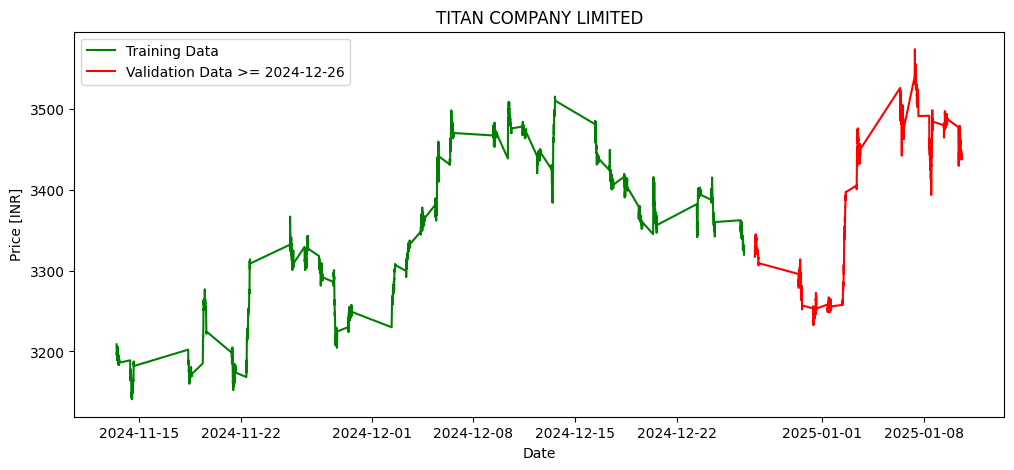

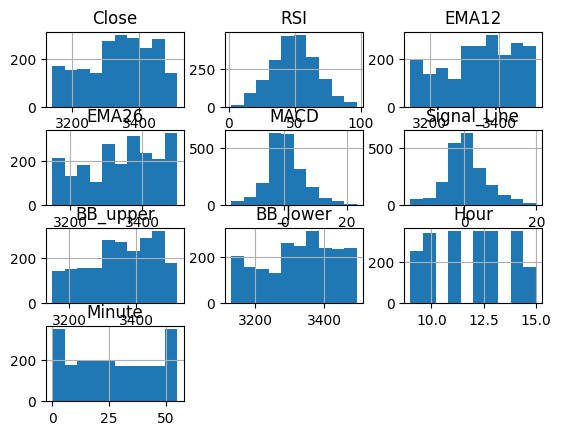

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - MSE: 0.0643 - loss: 0.0643 - val_MSE: 0.0025 - val_loss: 0.0025
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - MSE: 0.0045 - loss: 0.0045 - val_MSE: 0.0023 - val_loss: 0.0023
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - MSE: 0.0033 - loss: 0.0033 - val_MSE: 0.0020 - val_loss: 0.0020
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - MSE: 0.0031 - loss: 0.0031 - val_MSE: 0.0016 - val_loss: 0.0016
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - MSE: 0.0024 - loss: 0.0024 - val_MSE: 0.0016 - val_loss: 0.0016
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - MSE: 0.0024 - loss: 0.0024 - val_MSE: 0.0013 - val_loss: 0.0013
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - MSE: 0.0019 - loss: 0.0019 - val_MSE: 0.0017 - val_loss: 0.0017
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - MSE: 0.0021 - loss: 0.0021 - val_MSE: 0.0015 - val_loss: 0.0015
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - MSE: 0.0017 - loss: 0.

saving weights
plotting loss


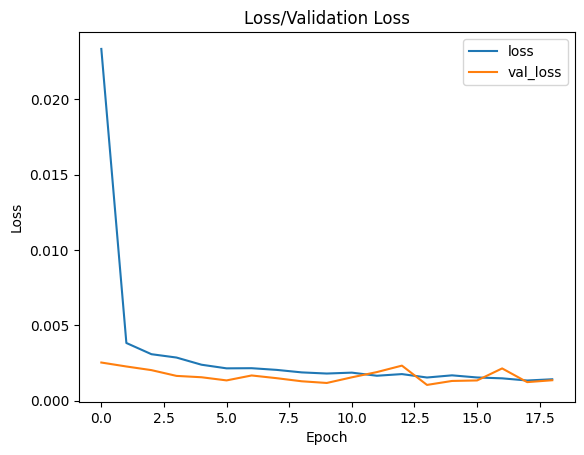

plotting MSE


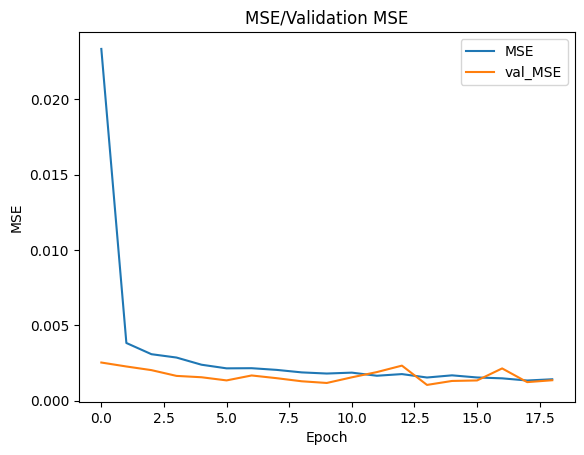

display the content of the model
26/26 - 0s - 7ms/step - MSE: 0.0010 - loss: 0.0010
loss :  0.0010440662736073136
compile_metrics :  0.0010440662736073136

plotting prediction results
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
plotting predictions


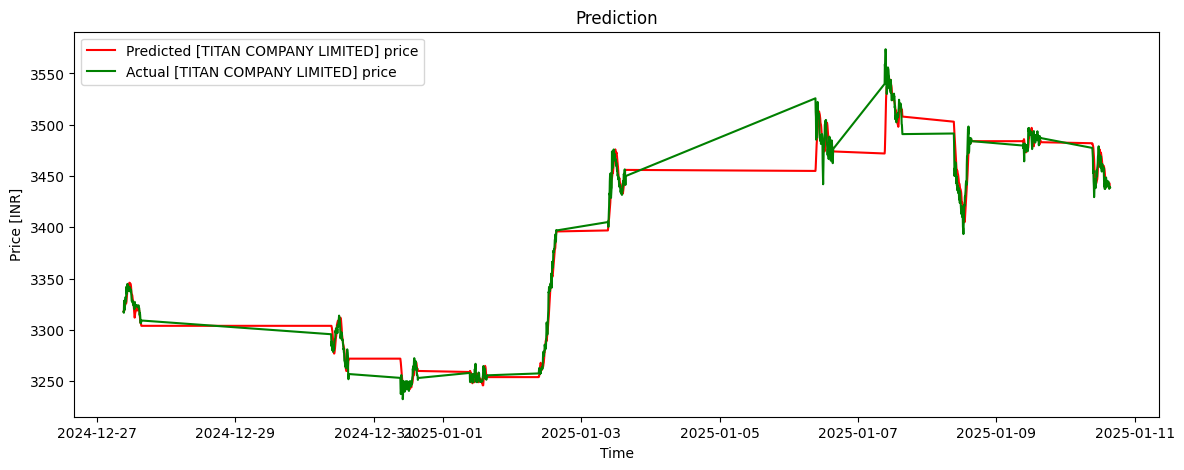

prediction is finished


In [6]:
import numpy as np
STOCK_TICKER = "TITAN.NS"
last_60_day = datetime.now() - timedelta(days=59)
last_45_day = datetime.now() - timedelta(days=15)
STOCK_START_DATE = pd.to_datetime(last_60_day)
STOCK_VALIDATION_DATE = pd.to_datetime(last_45_day)
EPOCHS = 50
BATCH_SIZE = 32
TIME_STEPS = 15
TODAY_RUN = datetime.today().strftime("%Y%m%d")
TOKEN = STOCK_TICKER + '_' + TODAY_RUN + '_' + secrets.token_hex(16)

# create project run folder
PROJECT_FOLDER = os.path.join(os.getcwd(), TOKEN)
if not os.path.exists(PROJECT_FOLDER):
    os.makedirs(PROJECT_FOLDER)

stock_prediction = StockPrediction(STOCK_TICKER,
                                   STOCK_START_DATE,
                                   STOCK_VALIDATION_DATE,
                                   PROJECT_FOLDER,
                                   EPOCHS,
                                   TIME_STEPS,
                                   TOKEN,
                                   BATCH_SIZE)

# Execute Deep Learning model
stock_data = StockData(stock_prediction)
plotter = Plotter(True, PROJECT_FOLDER, stock_data.get_stock_short_name(), stock_data.get_stock_currency(), STOCK_TICKER)
(x_train, y_train), (x_test, y_test), (training_data, test_data) = stock_data.download_transform_to_numpy(TIME_STEPS, PROJECT_FOLDER)
plotter.plot_histogram_data_split(training_data, test_data, STOCK_VALIDATION_DATE)

lstm = LongShortTermMemory(PROJECT_FOLDER)
model = lstm.create_model(x_train)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=lstm.get_defined_metrics())
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

# history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test),
#                     callbacks=[lstm.get_callback()])
print("saving weights")
model.save(os.path.join(PROJECT_FOLDER, 'model_weights.h5'))

plotter.plot_loss(history)
plotter.plot_mse(history)

print("display the content of the model")
baseline_results = model.evaluate(x_test, y_test, verbose=2)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

print("plotting prediction results")
test_predictions_baseline = model.predict(x_test)

num_features = x_test.shape[2]  # Update this based on your actual data
test_predictions_baseline_padded = np.zeros((test_predictions_baseline.shape[0], num_features))
test_predictions_baseline_padded[:, 0] = test_predictions_baseline.flatten()

# test_predictions_baseline = data.get_min_max().inverse_transform(test_predictions_baseline)
# Perform inverse transform
test_predictions_baseline = stock_data.get_min_max().inverse_transform(test_predictions_baseline_padded)[:, 0]  # Extract only the first column

test_predictions_baseline = pd.DataFrame(test_predictions_baseline)
test_predictions_baseline.to_csv(os.path.join(PROJECT_FOLDER, 'predictions.csv'))

test_predictions_baseline.rename(columns={0: STOCK_TICKER + '_predicted'}, inplace=True)
test_predictions_baseline = test_predictions_baseline.round(decimals=0)
test_predictions_baseline.index = test_data.index
plotter.project_plot_predictions(test_predictions_baseline, test_data)
print("prediction is finished")

## Infer the Future Data (Predictions)

In [7]:
data = pd.read_csv(PROJECT_FOLDER + '/data_'+STOCK_TICKER+'.csv')
data

,Datetime,Close,High,Low,Open,Volume,RSI,EMA12,EMA26,MACD,Signal_Line,BB_upper,BB_lower,Hour,Minute
0,2024-11-13 10:50:00+05:30,3208.949951,3214.000000,3201.800049,3204.050049,12044,58.438018,3199.064716,3195.805691,3.259025,2.440473,3212.699645,3184.520399,10.0,50.0
1,2024-11-13 10:55:00+05:30,3205.199951,3209.500000,3202.000000,3208.000000,2646,62.716800,3200.008599,3196.501562,3.507036,2.653786,3212.507067,3186.732972,10.0,55.0
2,2024-11-13 11:00:00+05:30,3201.199951,3205.250000,3200.000000,3205.100098,5325,49.784998,3200.191884,3196.849591,3.342293,2.791487,3212.335825,3186.714199,11.0,0.0
3,2024-11-13 11:05:00+05:30,3200.600098,3202.600098,3196.000000,3202.600098,9764,49.731470,3200.254686,3197.127406,3.127279,2.858646,3211.310065,3186.964959,11.0,5.0
4,2024-11-13 11:10:00+05:30,3195.350098,3202.199951,3192.100098,3200.600098,12735,45.436772,3199.500134,3196.995754,2.504380,2.787793,3209.736617,3187.128422,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,2025-01-10 15:05:00+05:30,3442.050049,3442.600098,3437.500000,3440.000000,28167,44.851769,3442.338366,3445.511742,-3.173376,-3.694853,3448.430983,3435.774046,15.0,5.0
2977,2025-01-10 15:10:00+05:30,3437.550049,3442.750000,3437.050049,3441.449951,13193,31.418980,3441.601702,3444.921987,-3.320285,-3.619940,3448.485511,3435.229528,15.0,10.0
2978,2025-01-10 15:15:00+05:30,3439.850098,3440.000000,3436.000000,3437.800049,11076,36.263778,3441.332225,3444.546292,-3.214067,-3.538765,3448.373495,3435.571549,15.0,15.0
2979,2025-01-10 15:20:00+05:30,3439.350098,3442.100098,3438.449951,3440.000000,12007,41.697001,3441.027282,3444.161388,-3.134106,-3.457833,3448.244825,3435.895239,15.0,20.0


In [8]:
def generate_market_time_range(start_date, periods):
    """
    Generates a range of timestamps within stock market hours (9:15 AM to 3:30 PM) for a given number of periods.
    Each period corresponds to a 5-minute interval.
    """
    market_open = time(9, 15)  # 9:15 AM
    market_close = time(15, 30)  # 3:30 PM
    timestamps = []
    current_date = start_date.date()
    count = 0

    while count < periods:
        # Generate intraday 5-minute intervals within trading hours
        current_time = datetime.combine(current_date, market_open)
        while current_time.time() <= market_close and count < periods:
            timestamps.append(current_time)
            current_time += timedelta(minutes=5)
            count += 1
        current_date += timedelta(days=1)  # Move to the next day
    return pd.DatetimeIndex(timestamps)

In [9]:
model = tf.keras.models.load_model(os.path.join(PROJECT_FOLDER, "model_weights.h5"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 64)              │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,363 (216.27 KB)

 Trainable params: 55,361 (216.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [10]:
# You are predicting for the next 3 days. Each day has 6 hours of trading time (from 9:15 AM to 3:30 PM),
# and each hour has 12 intervals (5 minutes each).
# So, 6 * 12 = 72 intervals per day, and for 3 days, the total periods are 216
PTEDICTED_TIME = 72

## Close Price Prediction

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


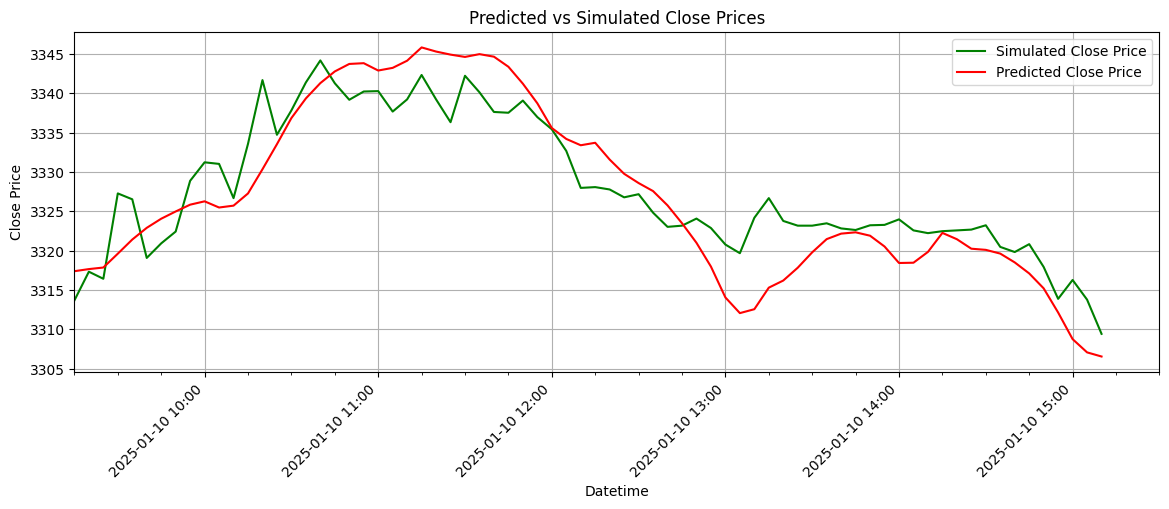

In [11]:
import matplotlib.dates as mdates
from datetime import timedelta, time
# Adjust the number of features dynamically
num_features = x_test.shape[2]  # Number of features in the dataset

# Perform inverse scaling on predicted values
predictions = model.predict(x_test)
predictions = predictions[:PTEDICTED_TIME]
y_test = y_test[:PTEDICTED_TIME]

# Inverse scaling for 'Close' price
predicted_close = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(predictions), 3)),  # Placeholders for Open, High, Low
    predictions,  # Predicted Close (assuming it is the first column of predictions)
    np.zeros((len(predictions), 10))  # Placeholder for remaining features
)))[:, 3]  # Here we select index 3 for 'Close' if 'Close' is the fourth column

# Perform inverse scaling for actual 'Close' values (y_test)
simulated_close = stock_data.get_min_max().inverse_transform(np.column_stack((
        np.zeros((len(y_test), 3)), y_test.reshape(-1, 1), np.zeros((len(y_test), 10))
    )))[:, 3]

predicted_dates = generate_market_time_range(datetime.today(), PTEDICTED_TIME)

# Add predictions and actual values to test_data
close_data = pd.DataFrame({
    'Datetime': predicted_dates,
    'Predicted Close Price': predicted_close,
    'Simulated Close Price': simulated_close,
})
close_data.to_csv(os.path.join(PROJECT_FOLDER, "predicted_data.csv"), index=False)

plt.figure(figsize=(14, 5))
# Plot Simulated Close vs Predicted Close
plt.plot(predicted_dates, simulated_close, label="Simulated Close Price", color="green")
plt.plot(predicted_dates, predicted_close, label="Predicted Close Price", color="red")

# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(predicted_dates[0].date(), time(9, 15))
end = datetime.combine(predicted_dates[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel("Datetime")
plt.ylabel("Close Price")
plt.title("Predicted vs Simulated Close Prices")
plt.legend()
plt.grid()
plt.show()

## Open Price Prediction

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


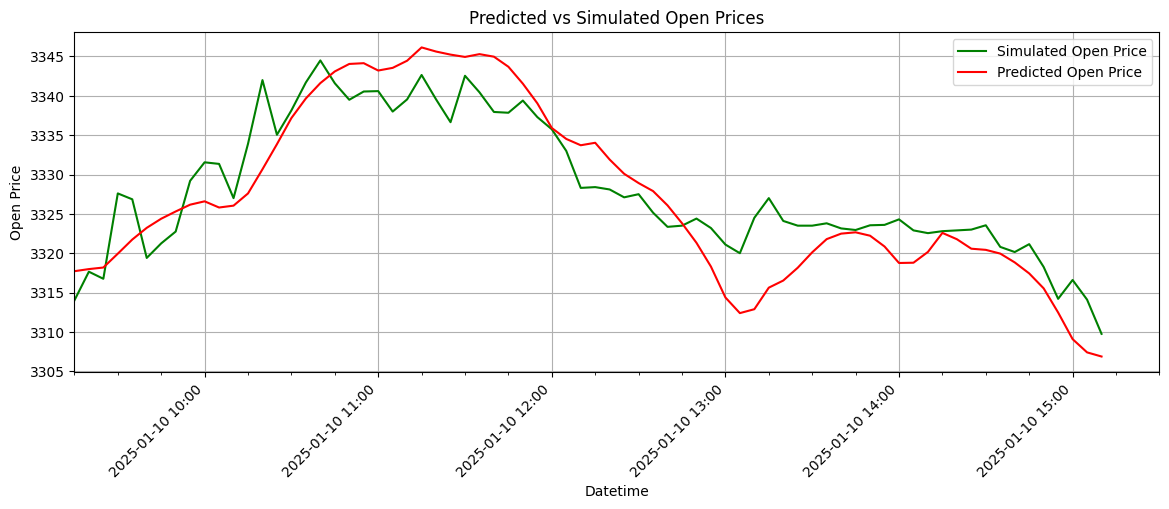

In [12]:
import matplotlib.dates as mdates
from datetime import timedelta, time
# Adjust the number of features dynamically
num_features = x_test.shape[2]  # Number of features in the dataset

# Perform inverse scaling on predicted values
predictions = model.predict(x_test)

predictions = predictions[:PTEDICTED_TIME]
y_test = y_test[:PTEDICTED_TIME]

predicted_open = stock_data.get_min_max().inverse_transform(np.column_stack((
    predictions,                      # Predicted values for "Open"
    np.zeros((len(predictions), 13))  # Placeholders for other features
)))[:, 0]  # Extract the "Open" price (index 0)

# Perform inverse scaling on actual values
simulated_open = stock_data.get_min_max().inverse_transform(np.column_stack((
    y_test.reshape(-1, 1),  # Actual values for Open
    np.zeros((len(y_test), 13))  # Placeholder for other features
)))[:, 0]  # Extract the "Open" price (column index 0)

predicted_dates = generate_market_time_range(datetime.today(), PTEDICTED_TIME)

open_data = pd.DataFrame({
    'Datetime': predicted_dates,
    'Predicted Open Price': predicted_open,
    'Simulated Open Price': simulated_open,
})
# Merge existing and additional data on the "Datetime" index
merged_data = pd.concat([close_data.set_index('Datetime'), open_data.set_index('Datetime')], axis=1).reset_index()

# Save the updated data back to the same CSV file
merged_data.to_csv(os.path.join(PROJECT_FOLDER, "predicted_data.csv"), index=False)

plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, simulated_open, label="Simulated Open Price", color="green")
plt.plot(predicted_dates, predicted_open, label="Predicted Open Price", color="red")
# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(predicted_dates[0].date(), time(9, 15))
end = datetime.combine(predicted_dates[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel("Datetime")
plt.ylabel("Open Price")
plt.title("Predicted vs Simulated Open Prices")
plt.legend()
plt.grid()
plt.show()

## High Price Prediction

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


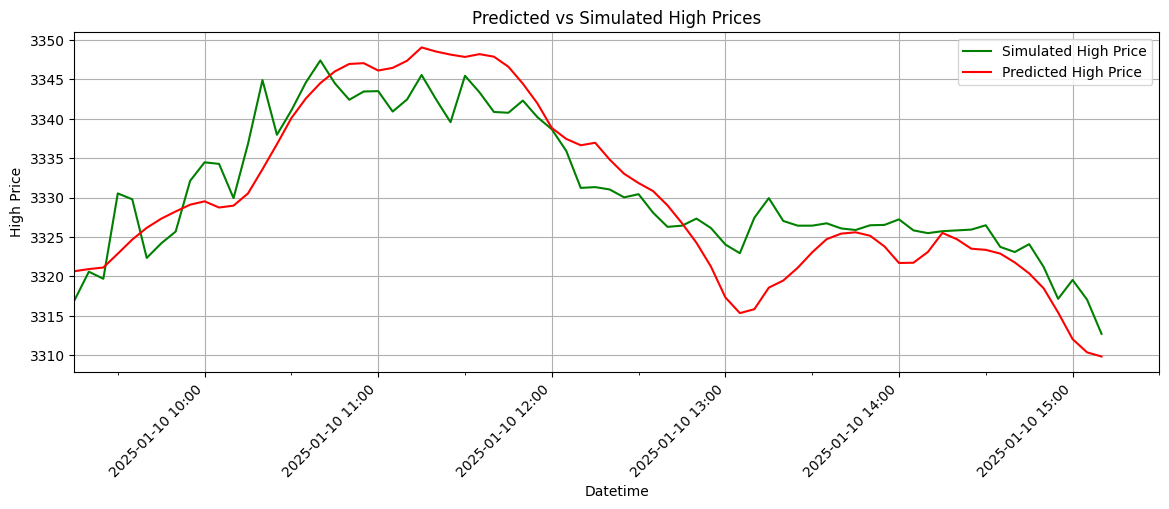

In [13]:
import matplotlib.dates as mdates
from datetime import timedelta, time
# Adjust the number of features dynamically
num_features = x_test.shape[2]  # Number of features in the dataset

# Perform inverse scaling on predicted values
predictions = model.predict(x_test)

predictions = predictions[:PTEDICTED_TIME]
y_test = y_test[:PTEDICTED_TIME]

predicted_high = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(predictions), 1)),  # Placeholder for 'Open'
    predictions,                      # Predicted values for 'High'
    np.zeros((len(predictions), 12))  # Placeholders for remaining features
)))[:, 1]  # Extract the 'High' price from column index 1


simulated_high = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(y_test), 1)),       # Placeholder for 'Open'
    y_test.reshape(-1, 1),           # Actual 'High' values (target)
    np.zeros((len(y_test), 12))      # Placeholders for remaining features
)))[:, 1]  # Extract the 'High' price from column index 1


predicted_dates = generate_market_time_range(datetime.today(), PTEDICTED_TIME)

high_data = pd.DataFrame({
    'Datetime': predicted_dates,
    'Predicted High Price': predicted_high,
    'Simulated High Price': simulated_high,
})
# Merge existing and additional data on the "Datetime" index
merged_data = pd.concat([close_data.set_index('Datetime'), open_data.set_index('Datetime'), high_data.set_index('Datetime')], axis=1).reset_index()

# Save the updated data back to the same CSV file
merged_data.to_csv(os.path.join(PROJECT_FOLDER, "predicted_data.csv"), index=False)

plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, simulated_high, label="Simulated High Price", color="green")
plt.plot(predicted_dates, predicted_high, label="Predicted High Price", color="red")
# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(predicted_dates[0].date(), time(9, 15))
end = datetime.combine(predicted_dates[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel("Datetime")
plt.ylabel("High Price")
plt.title("Predicted vs Simulated High Prices")
plt.legend()
plt.grid()
plt.show()

## Low Price Prediction

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


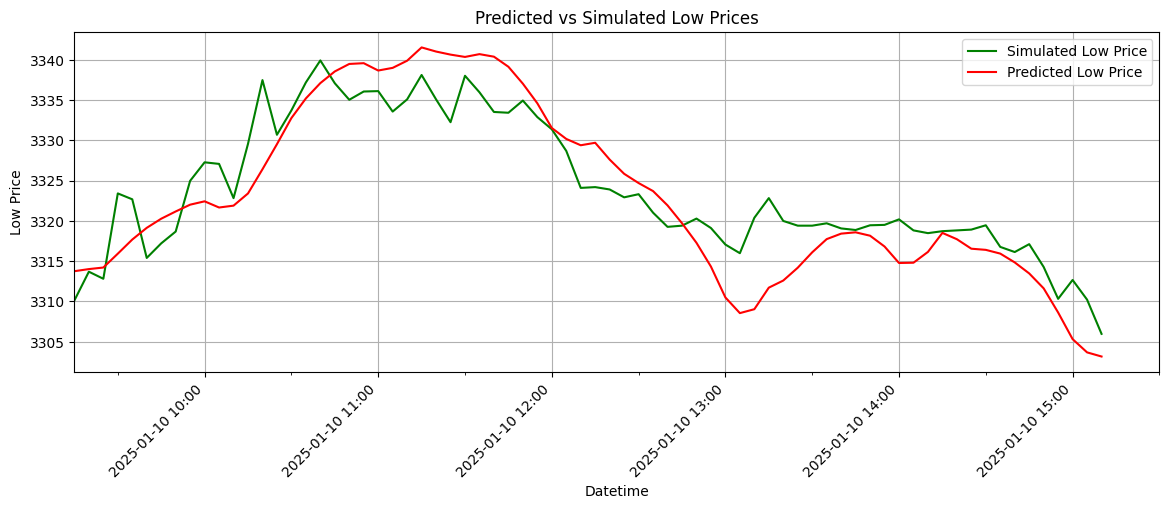

In [14]:
import matplotlib.dates as mdates
from datetime import timedelta, time
# Adjust the number of features dynamically
num_features = x_test.shape[2]  # Number of features in the dataset

# Perform inverse scaling on predicted values
predictions = model.predict(x_test)

predictions = predictions[:PTEDICTED_TIME]
y_test = y_test[:PTEDICTED_TIME]

# Inverse transform for Predicted Low price
predicted_low = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(predictions), 2)),  # Placeholder for columns before "Low"
    predictions,                     # Predicted values
    np.zeros((len(predictions), 11))  # Placeholder for columns after "Low"
)))[:, 2]  # Extract the "Low" value (column index 2)

# Inverse transform for Simulated Low price (actual values)
simulated_low = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(y_test), 2)),  # Placeholder for columns before "Low"
    y_test.reshape(-1, 1),       # Actual "Low" values (target)
    np.zeros((len(y_test), 11))   # Placeholder for columns after "Low"
)))[:, 2]  # Extract the "Low" value (column index 2)

predicted_dates = generate_market_time_range(datetime.today(), PTEDICTED_TIME)

low_data = pd.DataFrame({
    'Datetime': predicted_dates,
    'Predicted Low Price': predicted_low,
    'Simulated Low Price': simulated_low,
})
# Merge existing and additional data on the "Datetime" index
merged_data = pd.concat([close_data.set_index('Datetime'), open_data.set_index('Datetime'), high_data.set_index('Datetime'), low_data.set_index('Datetime')], axis=1).reset_index()

# Save the updated data back to the same CSV file
merged_data.to_csv(os.path.join(PROJECT_FOLDER, "predicted_data.csv"), index=False)

plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, simulated_low, label="Simulated Low Price", color="green")
plt.plot(predicted_dates, predicted_low, label="Predicted Low Price", color="red")
# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(predicted_dates[0].date(), time(9, 15))
end = datetime.combine(predicted_dates[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel("Datetime")
plt.ylabel("Low Price")
plt.title("Predicted vs Simulated Low Prices")
plt.legend()
plt.grid()
plt.show()

## Volume Prediction

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


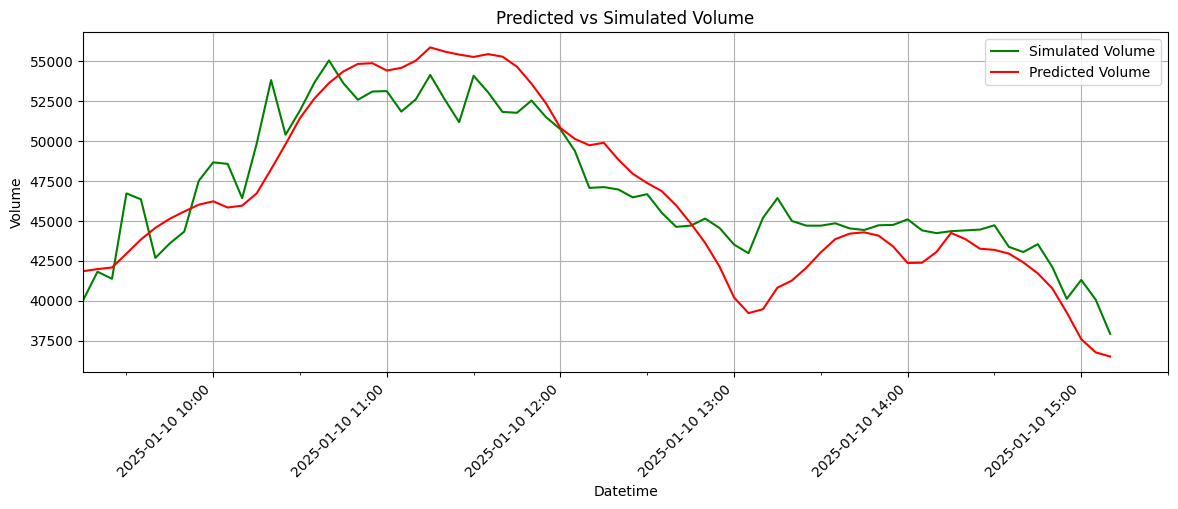

In [16]:
import matplotlib.dates as mdates
from datetime import timedelta, time
# Adjust the number of features dynamically
num_features = x_test.shape[2]  # Number of features in the dataset

# Perform inverse scaling on predicted values
predictions = model.predict(x_test)

predictions = predictions[:PTEDICTED_TIME]
y_test = y_test[:PTEDICTED_TIME]

predicted_volume = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(predictions), 4)),  # Placeholders for the first 4 columns
    predictions,                      # Predicted values for 'Volume'
    np.zeros((len(predictions), 9))   # Placeholders for the remaining columns
)))[:, 4]  # Extract the 'Volume' value from column index 4

simulated_volume = stock_data.get_min_max().inverse_transform(np.column_stack((
    np.zeros((len(y_test), 4)),       # Placeholders for the first 4 columns
    y_test.reshape(-1, 1),           # Actual 'Volume' values (target)
    np.zeros((len(y_test), 9))       # Placeholders for the remaining columns
)))[:, 4]  # Extract the 'Volume' value from column index 4

predicted_dates = generate_market_time_range(datetime.today(), PTEDICTED_TIME)

volume_data = pd.DataFrame({
    'Datetime': predicted_dates,
    'Predicted Volume': predicted_volume,
    'Simulated Volume': simulated_volume,
})
# Merge existing and additional data on the "Datetime" index
merged_data = pd.concat([close_data.set_index('Datetime'), open_data.set_index('Datetime'), high_data.set_index('Datetime'), low_data.set_index('Datetime'), volume_data.set_index('Datetime')], axis=1).reset_index()

# Save the updated data back to the same CSV file
merged_data.to_csv(os.path.join(PROJECT_FOLDER, "predicted_data.csv"), index=False)

plt.figure(figsize=(14, 5))
plt.plot(predicted_dates, simulated_volume, label="Simulated Volume", color="green")
plt.plot(predicted_dates, predicted_volume, label="Predicted Volume", color="red")
# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(predicted_dates[0].date(), time(9, 15))
end = datetime.combine(predicted_dates[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel("Datetime")
plt.ylabel("Volume")
plt.title("Predicted vs Simulated Volume")
plt.legend()
plt.grid()
plt.show()

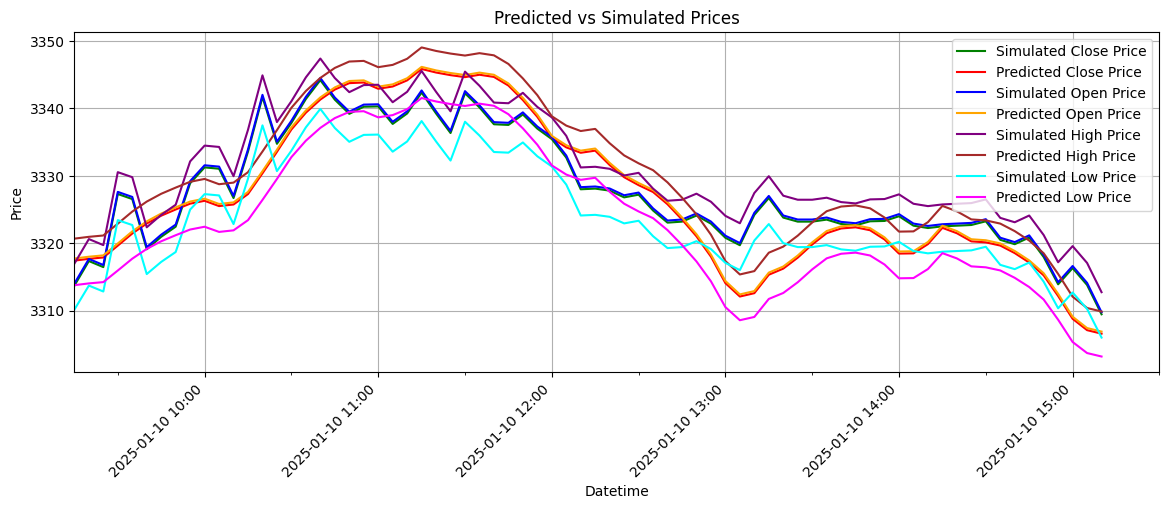

In [17]:
import matplotlib.dates as mdates
from datetime import timedelta, time

plt.figure(figsize=(14, 5))
# Plot Simulated Close vs Predicted Close
plt.plot(predicted_dates, simulated_close, label="Simulated Close Price", color="green")
plt.plot(predicted_dates, predicted_close, label="Predicted Close Price", color="red")

# Plot Simulated Open vs Predicted Open
plt.plot(predicted_dates, simulated_open, label="Simulated Open Price", color="blue")
plt.plot(predicted_dates, predicted_open, label="Predicted Open Price", color="orange")

# Plot Simulated High vs Predicted High
plt.plot(predicted_dates, simulated_high, label="Simulated High Price", color="purple")
plt.plot(predicted_dates, predicted_high, label="Predicted High Price", color="brown")

# # Plot Simulated Low vs Predicted Low
plt.plot(predicted_dates, simulated_low, label="Simulated Low Price", color="cyan")
plt.plot(predicted_dates, predicted_low, label="Predicted Low Price", color="magenta")

# # Plot Simulated Volume vs Predicted Volume
# plt.plot(predicted_dates, simulated_volume, label="Simulated Volume", color="yellow")
# plt.plot(predicted_dates, predicted_volume, label="Predicted Volume", color="black")

# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(predicted_dates[0].date(), time(9, 15))
end = datetime.combine(predicted_dates[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.title("Predicted vs Simulated Prices")
plt.legend()
plt.grid()
plt.show()

In [36]:
df = pd.read_csv(PROJECT_FOLDER + '/predicted_data.csv')
df

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,Simulated Volume
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,40009.761905
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,41807.075428
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,41363.938462
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,46706.828601
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,46337.507722
...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,42102.580220
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,40108.223428
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,41290.122374
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,40059.052777


## RSI for Predicted Data

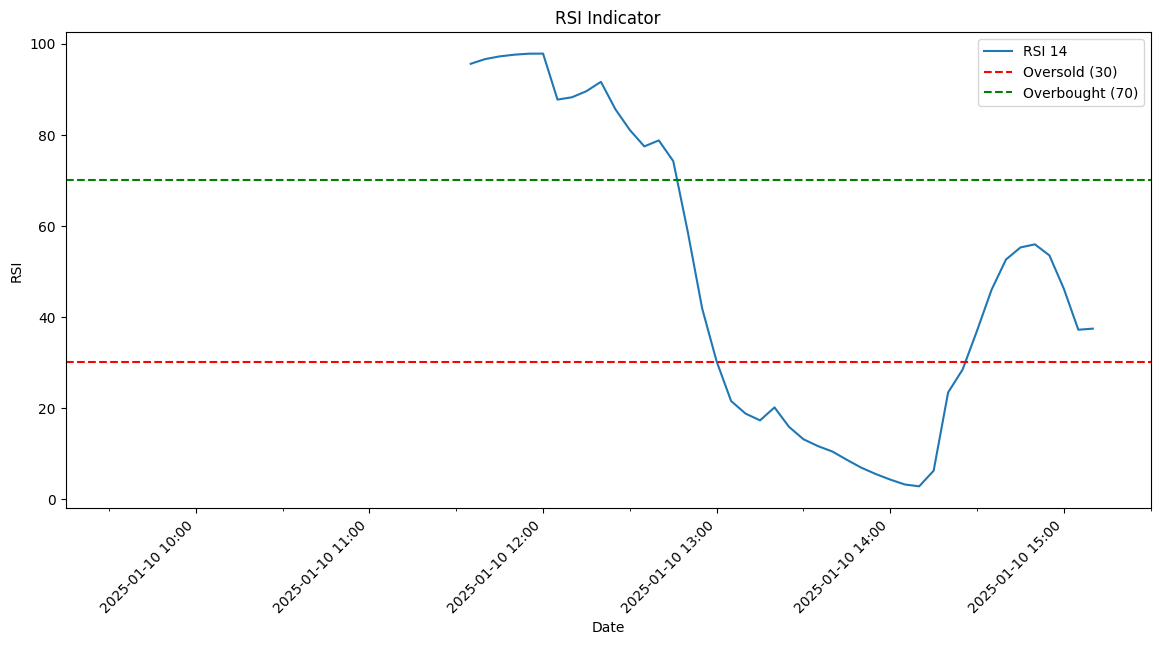

In [38]:
def EMA(Close_arr, n):
    a = 2 / (n + 1)
    EMA_n = np.zeros(len(Close_arr))
    EMA_n[:n] = np.nan

    # Initialize the first EMA value
    EMA_n[n] = np.mean(Close_arr[:n])

    # Calculate EMA for the rest of the values
    for i in range(n + 1, len(Close_arr)):
        EMA_n[i] = (Close_arr[i] - EMA_n[i - 1]) * a + EMA_n[i - 1]

    return EMA_n

def gains(Close_arr):
    gain_arr = np.diff(Close_arr)
    gain_arr[gain_arr < 0] = 0
    return gain_arr

def losses(Close_arr):
    loss_arr = np.diff(Close_arr)
    loss_arr[loss_arr > 0] = 0
    return np.abs(loss_arr)

def RSI(Close_arr, n=14):
    gain_arr = gains(Close_arr)
    loss_arr = losses(Close_arr)

    EMA_u = EMA(gain_arr, n)
    EMA_d = EMA(loss_arr, n)

    EMA_diff = EMA_u / EMA_d

    RSI_n = 100 - (100 / (1 + EMA_diff))
    RSI_n = np.concatenate((np.full(n, np.nan), RSI_n))  # Align lengths by padding initial values with NaN
    return RSI_n


# Use the closing prices to calculate RSI
Close = df['Predicted Close Price'].values
RSI14 = RSI(Close, n=14)

# Ensure the lengths match by trimming the RSI array if necessary
RSI14 = RSI14[:len(df)]

# Adding the RSI to the dataframe
df['RSI14'] = RSI14


# Save the dataframe with RSI to a new CSV file
df.to_csv(os.path.join(PROJECT_FOLDER, "predicted_data_RSI.csv"), index=False)
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Plot the RSI
plt.figure(figsize=(14, 7))
plt.plot(df['Datetime'], df['RSI14'], label='RSI 14')
plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
plt.title('RSI Indicator')
# Customize the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # 15-minute intervals
# Limit x-axis to market hours for the date range
start = datetime.combine(df['Datetime'].iloc[0].date(), time(9, 15))
end = datetime.combine(df['Datetime'].iloc[-1].date(), time(15, 30))
plt.xlim(start, end)
plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [41]:
df = pd.read_csv(PROJECT_FOLDER + '/predicted_data_RSI.csv')
df

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,Simulated Volume,RSI14
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,40009.761905,NaN
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,41807.075428,NaN
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,41363.938462,NaN
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,46706.828601,NaN
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,46337.507722,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,42102.580220,55.933513
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,40108.223428,53.506761
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,41290.122374,46.176336
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,40059.052777,37.188386


In [42]:
short_window = int(0.025 * len(df))
long_window = int(0.05 * len(df))

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

# Short Moving Average
signals['short_ma'] = df['Predicted Close Price'].rolling(window=short_window, min_periods=1, center=False).mean()
# Long Moving Average
signals['long_ma'] = df['Predicted Close Price'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:]
                                            > signals['long_ma'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
# A value of +1.0 in positions indicates a buy signal.
# A value of -1.0 in positions indicates a sell signal.
signals

<ipython-input-42-193d7aa3dbc1>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:]


,signal,short_ma,long_ma,positions
0,0.0,3317.401097,3317.401097,NaN
1,1.0,3317.669363,3317.535230,1.0
2,1.0,3317.867182,3317.645881,0.0
3,1.0,3319.627206,3318.387917,0.0
4,1.0,3321.423694,3319.639361,0.0
...,...,...,...,...
67,0.0,3315.219037,3316.951477,0.0
68,0.0,3312.150881,3314.829321,0.0
69,0.0,3308.770031,3312.046650,0.0
70,0.0,3307.086230,3309.335714,0.0


In [43]:
# Merge signals with the original dataframe
df['Short Moving Average'] = signals['short_ma']
df['Long Moving Average'] = signals['long_ma']
df['Signal'] = signals['signal']
df['Positions'] = signals['positions']

# Save the updated DataFrame back to the CSV
output_file = PROJECT_FOLDER + '/predicted_data_RSI_MA.csv'
df.to_csv(output_file, index=False)

print(f"Updated data with signals saved to {output_file}")


Updated data with signals saved to /content/stock-prediction/TITAN.NS_20250110_e73e915dbe2a01eb689b6ca4c505415a/predicted_data_RSI_MA.csv


In [44]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 10000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %s: buy %d units at price %f, total balance %f'
                % (df['Datetime'][i], buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %s: cannot sell anything, inventory 0' % (df['Datetime'][i]))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %s, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (df['Datetime'][i], sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [45]:
states_buy, states_sell, total_gains, invest = buy_stock(df['Predicted Close Price'], signals['positions'])

day 2025-01-10 09:20:00: buy 1 units at price 3317.669363, total balance 6682.330637
day 2025-01-10 10:05:00, sell 1 units at price 3325.493789, investment 0.235841 %, total balance 10007.824425,
day 2025-01-10 10:15:00: buy 1 units at price 3327.281308, total balance 6680.543117
day 2025-01-10 11:00:00, sell 1 units at price 3342.900375, investment 0.469424 %, total balance 10023.443493,
day 2025-01-10 11:10:00: buy 1 units at price 3344.148077, total balance 6679.295416
day 2025-01-10 11:25:00, sell 1 units at price 3344.922259, investment 0.023150 %, total balance 10024.217675,
day 2025-01-10 11:35:00: buy 1 units at price 3344.983128, total balance 6679.234547
day 2025-01-10 11:40:00, sell 1 units at price 3344.659596, investment -0.009672 %, total balance 10023.894142,
day 2025-01-10 13:15:00: buy 1 units at price 3315.308663, total balance 6708.585479
day 2025-01-10 13:50:00, sell 1 units at price 3321.909863, investment 0.199113 %, total balance 10030.495342,
day 2025-01-10 14:1

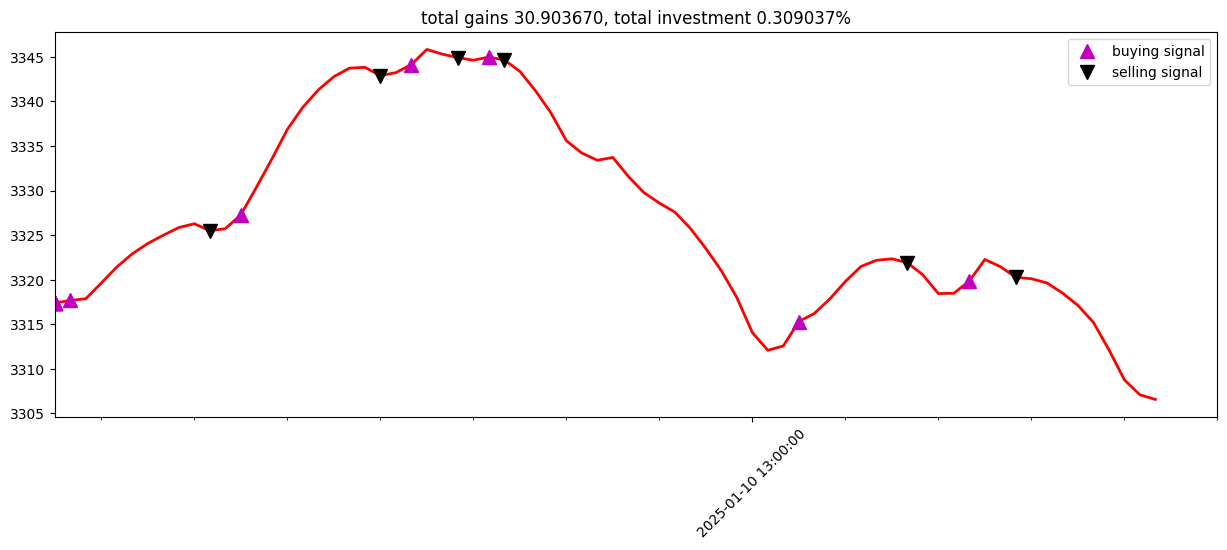

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator, HourLocator
from datetime import datetime, time

# Ensure the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create Series of buy and sell dates based on indices in states_buy and states_sell
buy_dates = pd.Series(df['Datetime'].iloc[states_buy])
sell_dates = pd.Series(df['Datetime'].iloc[states_sell])

# Plotting
close = df['Predicted Close Price']
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the predicted price line
ax.plot(df['Datetime'], close, color='r', lw=2.)

# Plot the buy signals (marker '^' for buying)
ax.plot(df['Datetime'], close, '^', markersize=10, color='m', label='buying signal', markevery=states_buy)

# Plot the sell signals (marker 'v' for selling)
ax.plot(df['Datetime'], close, 'v', markersize=10, color='k', label='selling signal', markevery=states_sell)

# Add title with total gains and investment percentages
ax.set_title('total gains %f, total investment %f%%' % (total_gains, invest))

# Customize the x-axis datetime format
date_format = DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(HourLocator(interval=5))
ax.xaxis.set_minor_locator(MinuteLocator(interval=30))

# Extract start and end datetime for market hours
start_date = df['Datetime'].iloc[0].date()
end_date = df['Datetime'].iloc[-1].date()

start = datetime.combine(start_date, time(9, 15))
end = datetime.combine(end_date, time(15, 30))

# Set x-axis limits
plt.xlim(pd.Timestamp(start), pd.Timestamp(end))

# Rotate datetime labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.show()


In [47]:
data = pd.read_csv(PROJECT_FOLDER + '/predicted_data_RSI_MA.csv')
data

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,Simulated Volume,RSI14,Short Moving Average,Long Moving Average,Signal,Positions
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,40009.761905,NaN,3317.401097,3317.401097,0.0,NaN
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,41807.075428,NaN,3317.669363,3317.535230,1.0,1.0
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,41363.938462,NaN,3317.867182,3317.645881,1.0,0.0
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,46706.828601,NaN,3319.627206,3318.387917,1.0,0.0
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,46337.507722,NaN,3321.423694,3319.639361,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,42102.580220,55.933513,3315.219037,3316.951477,0.0,0.0
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,40108.223428,53.506761,3312.150881,3314.829321,0.0,0.0
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,41290.122374,46.176336,3308.770031,3312.046650,0.0,0.0
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,40059.052777,37.188386,3307.086230,3309.335714,0.0,0.0


In [61]:
data['Predicted High Price'] = pd.to_numeric(data['Predicted High Price'], errors='coerce')

# Compute the MaxHigh column
data['MaxHigh'] =round(data['Predicted High Price'].max(), 2)
data['Predicted Close Price']= pd.to_numeric(data['Predicted Close Price'], errors='coerce')
data['Predicted Open Price']= pd.to_numeric(data['Predicted Open Price'], errors='coerce')
data['Predicted Low Price']= pd.to_numeric(data['Predicted Low Price'], errors='coerce')
data['MaxLow']=round(data['Predicted Low Price'].min(), 2)
data['TypicalPrice'] = (data['Predicted High Price'] + data['Predicted Low Price'] + data['Predicted Close Price']) / 3
data['TypicalPrice']= pd.to_numeric(data['TypicalPrice'], errors='coerce')
data['Volume']= pd.to_numeric(data['Predicted Volume'], errors='coerce')
data['CumPriceVolume'] = (data['TypicalPrice'] * data['Predicted Volume']).cumsum()
data['CumVolume'] = data['Predicted Volume'].cumsum()
data['VWAP'] = data['CumPriceVolume'] / data['CumVolume']
data['Avg_Volume']=data['Predicted Volume'].rolling(window=3).mean()
#data['50-Day SMA'] = data['Close'].rolling(window=7).mean()
data['10-Day EMA']=data['Predicted Close Price'].ewm(span=10, adjust=False).mean()

# Function to implement Moving Average Crossover (MAC) Strategy for day trading
def intraday_moving_average_crossover(data):
    data["Short_MA"] = data["Predicted Close Price"].rolling(window=5).mean()  # 5-minute MA
    data["Long_MA"] = data["Predicted Close Price"].rolling(window=20).mean()  # 20-minute MA
    data["Signal_MA"] = 0
    data.loc[data["Short_MA"] > data["Long_MA"], "Signal_MA"] = 1
    data.loc[data["Short_MA"] <= data["Long_MA"], "Signal_MA"] = -1
    return data

# Function to implement RSI (Relative Strength Index) Strategy for day trading
def intraday_rsi_strategy(data, period=14):
    delta = data["Predicted Close Price"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(period).mean()
    rs = gain / loss
    data["RSI"] = 100 - (100 / (1 + rs))
    data["Signal_RSI"] = 0
    data.loc[data["RSI"] < 30, "Signal_RSI"] = 1  # Oversold
    data.loc[data["RSI"] > 70, "Signal_RSI"] = -1  # Overbought
    return data

# Function to implement Bollinger Bands Strategy for day trading
def intraday_bollinger_bands_strategy(data, period=20):
    data["BB_MA"] = data["Predicted Close Price"].rolling(window=period).mean()
    data["BB_Upper"] = data["BB_MA"] + 2 * data["Predicted Close Price"].rolling(window=period).std()
    data["BB_Lower"] = data["BB_MA"] - 2 * data["Predicted Close Price"].rolling(window=period).std()
    data["Signal_BB"] = 0
    data.loc[data["Predicted Close Price"] < data["BB_Lower"], "Signal_BB"] = 1  # Buy
    data.loc[data["Predicted Close Price"] > data["BB_Upper"], "Signal_BB"] = -1  # Sell
    return data

    #Breatk out strategy
def intraday_breakout_strategy(data, lookback=20):
    # Calculate rolling High and Low
    data["High_Max"] = data["Predicted High Price"].rolling(window=lookback).max()
    data["Low_Min"] = data["Predicted Low Price"].rolling(window=lookback).min()

    # Drop NaN values introduced by rolling
    data.dropna(subset=["High_Max", "Low_Min"], inplace=True)

    # Initialize breakout signal
    data["Signal_Breakout"] = 0

    # Debug: Print the last few rows of the rolling calculations
    print("Debug: Rolling High and Low")
    print(data[["Predicted High Price", "Predicted Low Price", "Predicted Close Price", "High_Max", "Low_Min"]].tail())

    # Apply breakout conditions
    data.loc[data["Predicted Close Price"] > data["High_Max"], "Signal_Breakout"] = 1  # Breakout upward
    data.loc[data["Predicted Close Price"] < data["Low_Min"], "Signal_Breakout"] = -1  # Breakout downward

    # Debug: Check if any signals are generated
    breakout_signals = data[data["Signal_Breakout"] != 0]
    print("Debug: Breakout Signals")
    print(breakout_signals[["Predicted Close Price", "High_Max", "Low_Min", "Signal_Breakout"]])

    if breakout_signals.empty:
        print("No breakout signals were generated. Consider adjusting the lookback period or checking the data.")

    return data

# Function to implement Mean Reversion Strategy for day trading
def intraday_mean_reversion_strategy(data, period=20):
    data["Mean"] = data["Predicted Close Price"].rolling(window=period).mean()
    data["Signal_MR"] = 0
    data.loc[data["Predicted Close Price"] < data["Mean"], "Signal_MR"] = 1  # Below mean
    data.loc[data["Predicted Close Price"] > data["Mean"], "Signal_MR"] = -1  # Above mean
    return data
    #
    #Pivot point
def pivot_points_breakout(data):
    # Calculate pivot points
    data["Pivot"] = (data["Predicted High Price"] + data["Predicted Low Price"] + data["Predicted Close Price"]) / 3
    data["R1"] = 2 * data["Pivot"] - data["Predicted Low Price"]
    data["S1"] = 2 * data["Pivot"] - data["Predicted High Price"]

    # Add breakout signal
    data["Signal_Breakout"] = 0
    data.loc[data["Predicted Close Price"] > data["R1"], "Signal_Breakout"] = 1
    data.loc[data["Predicted Close Price"] < data["S1"], "Signal_Breakout"] = -1

    return data

# Support level adn Restiance level
def calculate_pivot_levels(data):
    # Calculate Pivot Point (P), Resistance (R1, R2), and Support (S1, S2)
    data["Pivot"] = (data["Predicted High Price"] + data["Predicted Low Price"] + data["Predicted Close Price"]) / 3
    data["R1"] = (2 * data["Pivot"]) - data["Predicted Low Price"]
    data["S1"] = (2 * data["Pivot"]) - data["Predicted High Price"]
    data["R2"] = data["Pivot"] + (data["Predicted High Price"] - data["Predicted Low Price"])
    data["S2"] = data["Pivot"] - (data["Predicted High Price"] - data["Predicted Low Price"])

    return data

def calculate_dynamic_support_resistance(data, window=10):
    # Support: Minimum price over the rolling window
    data["Dynamic_Support"] = data["Predicted Low Price"].rolling(window=window).min()
    # Resistance: Maximum price over the rolling window
    data["Dynamic_Resistance"] = data["Predicted High Price"].rolling(window=window).max()
    return data

# Main function to run all strategies for intraday trading
def implement_intraday_strategies(data):

    data=data.copy()
    # Apply strategies
    data = intraday_moving_average_crossover(data)
    data = intraday_rsi_strategy(data)
    data = intraday_bollinger_bands_strategy(data)
    data = intraday_breakout_strategy(data)
    data = intraday_mean_reversion_strategy(data)

    # Plot intraday data with strategies
    plt.figure(figsize=(14, 10))
    plt.plot(data.index, data["Predicted Close Price"], label="Predicted Close Price", color="blue")
    plt.plot(data.index, data["Short_MA"], label="Short MA (5m)", color="green", linestyle="--")
    plt.plot(data.index, data["Long_MA"], label="Long MA (20m)", color="red", linestyle="--")
    plt.plot(data.index, data["BB_Upper"], label="Bollinger Upper", color="orange", linestyle=":")
    plt.plot(data.index, data["BB_Lower"], label="Bollinger Lower", color="orange", linestyle=":")
    plt.scatter(data[data["Signal_Breakout"] == 1].index, data[data["Signal_Breakout"] == 1]["Predicted Close Price"], label="Breakout Buy", marker="^", color="green")
    plt.scatter(data[data["Signal_Breakout"] == -1].index, data[data["Signal_Breakout"] == -1]["Predicted Close Price"], label="Breakout Sell", marker="v", color="red")
    plt.title(f"Intraday Trading Strategies for {STOCK_TICKER}")
    # # Customize the x-axis
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    # plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hourly intervals
    # plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # 15-minute intervals
    # # Limit x-axis to market hours for the date range
    # data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')
    # start = datetime.combine(data['Datetime'].iloc[0].date(), time(9, 15))
    # end = datetime.combine(data['Datetime'].iloc[-1].date(), time(15, 30))
    # plt.xlim(start, end)
    # plt.gcf().autofmt_xdate(rotation=45)  # Adjust the angle of rotation as needed
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

    return data

def calculate_buy_sell_ranges(data, window=10):
    # Dynamic support and resistance
    data["Dynamic_Support"] = data["Predicted Low Price"].rolling(window=window).min()
    data["Dynamic_Resistance"] = data["Predicted High Price"].rolling(window=window).max()

    # Pivot-based levels
    data["Pivot"] = (data["Predicted High Price"] + data["Predicted Low Price"] + data["Predicted Close Price"]) / 3
    data["R1"] = (2 * data["Pivot"]) - data["Predicted Low Price"]
    data["S1"] = (2 * data["Pivot"]) - data["Predicted High Price"]
    data["R2"] = data["Pivot"] + (data["Predicted High Price"] - data["Predicted Low Price"])
    data["S2"] = data["Pivot"] - (data["Predicted High Price"] - data["Predicted Low Price"])

    # Buy and Sell Ranges
    data["Buy_Range"] = data[["Dynamic_Support", "S1", "S2"]].min(axis=1)  # Lowest of all supports
    data["Sell_Range"] = data[["Dynamic_Resistance", "R1", "R2"]].max(axis=1)  # Highest of all resistances

    return data

    # Identify the extreme bullish
def identify_extreme_bullish(data, window=10):
    # Calculate higher highs and higher lows
    data["Higher_Highs"] = data["Predicted High Price"] > data["Predicted High Price"].shift(1)
    data["Higher_Lows"] = data["Predicted Low Price"] > data["Predicted Low Price"].shift(1)
    data["Bullish_Trend"] = data["Higher_Highs"] & data["Higher_Lows"]
    data['CumPriceVolume'] = (data['TypicalPrice'] * data['Predicted Volume']).cumsum()
    data['CumVolume'] = data['Predicted Volume'].cumsum()
    # Identify periods where price is above VWAP
    data["Above_VWAP"] = data["Predicted Close Price"] > data["VWAP"]

    # Calculate RSI
    delta = data["Predicted Close Price"].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data["RSI"] = 100 - (100 / (1 + rs))

    # Extreme bullish condition
    data["Extreme_Bullish"] = (data["Bullish_Trend"]) & (data["Above_VWAP"]) & (data["RSI"] > 70)

    return data

def calculate_avg_buy_sell_ranges(data, window=10):
    # Dynamic support and resistance
    data["Dynamic_Support"] = data["Predicted Low Price"].rolling(window=window).min()
    data["Dynamic_Resistance"] = data["Predicted High Price"].rolling(window=window).max()

    # Pivot-based levels
    data["Pivot"] = (data["Predicted High Price"] + data["Predicted Low Price"] + data["Predicted Close Price"]) / 3
    data["R1"] = (2 * data["Pivot"]) - data["Predicted Low Price"]
    data["S1"] = (2 * data["Pivot"]) - data["Predicted High Price"]
    data["R2"] = data["Pivot"] + (data["Predicted High Price"] - data["Predicted Low Price"])
    data["S2"] = data["Pivot"] - (data["Predicted High Price"] - data["Predicted Low Price"])

    # Buy and Sell Ranges
    data["Buy_Range"] = data[["Dynamic_Support", "S1", "S2"]].min(axis=1)  # Lowest of all supports
    data["Sell_Range"] = data[["Dynamic_Resistance", "R1", "R2"]].max(axis=1)  # Highest of all resistances

    # Average Buy and Sell Ranges
    avg_buy_range = data["Buy_Range"].mean()
    avg_sell_range = data["Sell_Range"].mean()

    return avg_buy_range, avg_sell_range

Debug: Rolling High and Low
    Predicted High Price  Predicted Low Price  Predicted Close Price  \
67           3318.487111          3311.628476            3315.219037   
68           3315.425696          3308.632257            3312.150881   
69           3312.052275          3305.330677            3308.770031   
70           3310.372175          3303.686356            3307.086230   
71           3309.847768          3303.173118            3306.560669   

       High_Max      Low_Min  
67  3325.594488  3311.628476  
68  3325.594488  3308.632257  
69  3325.594488  3305.330677  
70  3325.594488  3303.686356  
71  3325.594488  3303.173118  
Debug: Breakout Signals
Empty DataFrame
Columns: [Predicted Close Price, High_Max, Low_Min, Signal_Breakout]
Index: []
No breakout signals were generated. Consider adjusting the lookback period or checking the data.


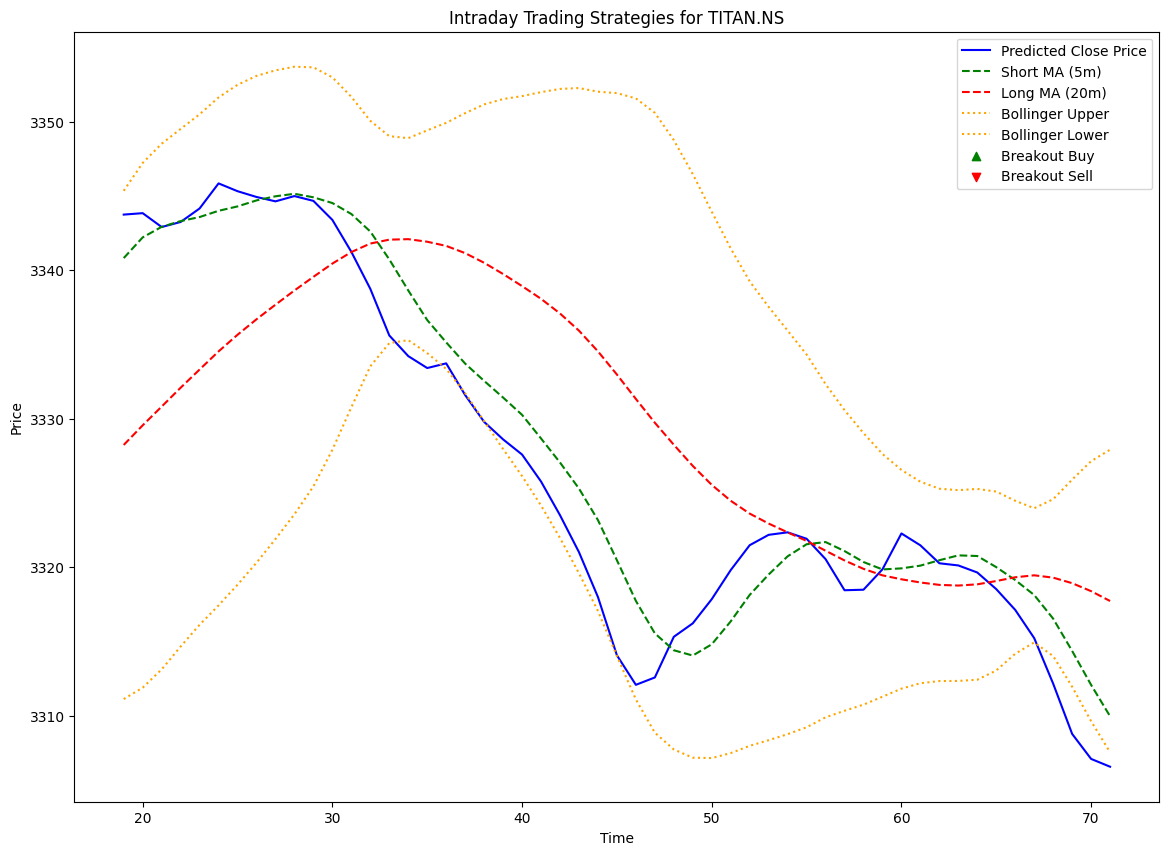

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,...,Signal_RSI,BB_MA,BB_Upper,BB_Lower,Signal_BB,High_Max,Low_Min,Signal_Breakout,Mean,Signal_MR
19,2025-01-10 10:50:00,3343.736688,3339.184295,3344.053061,3339.500000,3346.942096,3342.399707,3339.477483,3335.031828,54808.725611,...,-1,3328.226505,3345.337774,3311.115236,0,3346.942096,3313.759374,0,NaN,0
20,2025-01-10 10:55:00,3343.832750,3340.234190,3344.149137,3340.550049,3347.037948,3343.447295,3339.571293,3336.057107,54856.036301,...,-1,3329.548088,3347.212876,3311.883299,0,3347.037948,3314.021350,0,NaN,0
21,2025-01-10 11:00:00,3342.900375,3340.284231,3343.216626,3340.600098,3346.107622,3343.497226,3338.660779,3336.105975,54396.841660,...,-1,3330.809638,3348.506274,3313.113002,0,3347.037948,3314.214531,0,NaN,0
22,2025-01-10 11:05:00,3343.238327,3337.684515,3343.554627,3338.000000,3346.444831,3340.903223,3338.990807,3333.567213,54563.282940,...,-1,3332.078195,3349.503780,3314.652611,0,3347.037948,3315.933288,0,NaN,0
23,2025-01-10 11:10:00,3344.148077,3339.234336,3344.464510,3339.550049,3347.352582,3342.449639,3339.879226,3335.080697,55011.334755,...,-1,3333.304239,3350.490118,3316.118360,0,3347.352582,3317.687654,0,NaN,0
24,2025-01-10 11:15:00,3345.836494,3342.333735,3346.153174,3342.649902,3349.037288,3345.542227,3341.528055,3338.107425,55842.880101,...,-1,3334.524879,3351.625475,3317.424283,0,3349.037288,3319.139122,0,NaN,0
25,2025-01-10 11:20:00,3345.312071,3339.234336,3345.628675,3339.550049,3348.514018,3342.449639,3341.015929,3335.080697,55584.601895,...,-1,3335.644982,3352.474843,3318.815121,0,3349.037288,3320.272289,0,NaN,0
26,2025-01-10 11:25:00,3344.922259,3336.334615,3345.238806,3336.649902,3348.125063,3339.556289,3340.635257,3332.248964,55392.619753,...,-1,3336.687576,3353.076061,3320.299091,0,3349.037288,3321.170460,0,NaN,0
27,2025-01-10 11:30:00,3344.627778,3342.233896,3344.944282,3342.550049,3347.831229,3345.442607,3340.347680,3338.009927,55247.587724,...,-1,3337.669459,3353.448866,3321.890051,0,3349.037288,3321.662319,0,NaN,0
28,2025-01-10 11:35:00,3344.983128,3340.134107,3345.299684,3340.449951,3348.185798,3343.347432,3340.694699,3335.959370,55422.597713,...,-1,3338.625888,3353.692780,3323.558996,0,3349.037288,3321.662319,0,NaN,0


In [62]:
implement_intraday_strategies(data)

In [63]:
calculate_dynamic_support_resistance(data)

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,...,MaxLow,TypicalPrice,Volume,CumPriceVolume,CumVolume,VWAP,Avg_Volume,10-Day EMA,Dynamic_Support,Dynamic_Resistance
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,...,3303.17,3317.274949,41838.445138,1.387896e+08,4.183845e+04,3317.274949,NaN,3317.401097,NaN,NaN
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,...,3303.17,3317.540922,41970.566512,2.780287e+08,8.380901e+04,3317.408145,NaN,3317.449872,NaN,NaN
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,...,3303.17,3317.737050,42067.992379,4.175992e+08,1.258770e+05,3317.518065,41959.001343,3317.525747,NaN,NaN
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,...,3303.17,3319.482029,42934.804146,5.601205e+08,1.688118e+05,3318.017570,42324.454346,3317.907830,NaN,NaN
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,...,3303.17,3321.263161,43819.574644,7.056569e+08,2.126314e+05,3318.686429,42940.790390,3318.547078,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,...,3303.17,3315.111542,40763.780839,1.065024e+10,3.199358e+06,3328.867821,41617.007539,3318.669146,3311.628476,3325.519508
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,...,3303.17,3312.069611,39252.713361,1.078025e+10,3.238611e+06,3328.664223,40571.845439,3317.484007,3308.632257,3325.519508
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,...,3303.17,3308.717661,37587.644505,1.090462e+10,3.276199e+06,3328.435377,39201.379569,3315.899648,3305.330677,3325.519508
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,...,3303.17,3307.048254,36758.372797,1.102618e+10,3.312957e+06,3328.198080,37866.243554,3314.297208,3303.686356,3324.720626


In [64]:
identify_extreme_bullish(data)

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,...,Avg_Volume,10-Day EMA,Dynamic_Support,Dynamic_Resistance,Higher_Highs,Higher_Lows,Bullish_Trend,Above_VWAP,RSI,Extreme_Bullish
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,...,NaN,3317.401097,NaN,NaN,False,False,False,True,NaN,False
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,...,NaN,3317.449872,NaN,NaN,True,True,True,True,NaN,False
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,...,41959.001343,3317.525747,NaN,NaN,True,True,True,True,NaN,False
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,...,42324.454346,3317.907830,NaN,NaN,True,True,True,True,NaN,False
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,...,42940.790390,3318.547078,NaN,NaN,True,True,True,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,...,41617.007539,3318.669146,3311.628476,3325.519508,False,False,False,False,35.167874,False
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,...,40571.845439,3317.484007,3308.632257,3325.519508,False,False,False,False,27.243234,False
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,...,39201.379569,3315.899648,3305.330677,3325.519508,False,False,False,False,15.185190,False
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,...,37866.243554,3314.297208,3303.686356,3324.720626,False,False,False,False,0.000000,False


In [65]:
calculate_buy_sell_ranges(data)

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,...,Above_VWAP,RSI,Extreme_Bullish,Pivot,R1,S1,R2,S2,Buy_Range,Sell_Range
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,...,True,NaN,False,3317.274949,3320.790524,3313.885522,3324.179950,3310.369947,3310.369947,3324.179950
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,...,True,NaN,False,3317.540922,3321.060494,3314.149792,3324.451624,3310.630220,3310.630220,3324.451624
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,...,True,NaN,False,3317.737050,3321.259569,3314.344663,3324.651956,3310.822144,3310.822144,3324.651956
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,...,True,NaN,False,3319.482029,3323.030770,3316.078465,3326.434334,3312.529724,3312.529724,3326.434334
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,...,True,NaN,False,3321.263161,3324.838667,3317.848188,3328.253640,3314.272682,3314.272682,3328.253640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,...,False,35.167874,False,3315.111542,3318.594607,3311.735972,3321.970176,3308.252907,3308.252907,3325.519508
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,...,False,27.243234,False,3312.069611,3315.506965,3308.713527,3318.863050,3305.276173,3305.276173,3325.519508
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,...,False,15.185190,False,3308.717661,3312.104645,3305.383047,3315.439259,3301.996063,3301.996063,3325.519508
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,...,False,0.000000,False,3307.048254,3310.410152,3303.724333,3313.734073,3300.362435,3300.362435,3324.720626


In [68]:
output_file = PROJECT_FOLDER + '/predicted_data_final.csv'
data.to_csv(output_file, index=False)

In [69]:
data

,Datetime,Predicted Close Price,Simulated Close Price,Predicted Open Price,Simulated Open Price,Predicted High Price,Simulated High Price,Predicted Low Price,Simulated Low Price,Predicted Volume,...,Above_VWAP,RSI,Extreme_Bullish,Pivot,R1,S1,R2,S2,Buy_Range,Sell_Range
0,2025-01-10 09:15:00,3317.401097,3313.688035,3317.713607,3314.000000,3320.664375,3316.959473,3313.759374,3310.133371,41838.445138,...,True,NaN,False,3317.274949,3320.790524,3313.885522,3324.179950,3310.369947,3310.369947,3324.179950
1,2025-01-10 09:20:00,3317.669363,3317.337402,3317.981913,3317.649902,3320.932053,3320.600821,3314.021350,3313.697172,41970.566512,...,True,NaN,False,3317.540922,3321.060494,3314.149792,3324.451624,3310.630220,3310.630220,3324.451624
2,2025-01-10 09:25:00,3317.867182,3316.437631,3318.179761,3316.750000,3321.129437,3319.703027,3314.214531,3312.818498,42067.992379,...,True,NaN,False,3317.737050,3321.259569,3314.344663,3324.651956,3310.822144,3310.822144,3324.651956
3,2025-01-10 09:30:00,3319.627206,3327.286138,3319.940042,3327.600098,3322.885593,3330.527695,3315.933288,3323.412643,42934.804146,...,True,NaN,False,3319.482029,3323.030770,3316.078465,3326.434334,3312.529724,3312.529724,3326.434334
4,2025-01-10 09:35:00,3321.423694,3326.536248,3321.736794,3326.850098,3324.678134,3329.779453,3317.687654,3322.680336,43819.574644,...,True,NaN,False,3321.263161,3324.838667,3317.848188,3328.253640,3314.272682,3314.272682,3328.253640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-01-10 14:50:00,3315.219037,3317.937411,3315.531227,3318.250000,3318.487111,3321.199512,3311.628476,3314.283114,40763.780839,...,False,35.167874,False,3315.111542,3318.594607,3311.735972,3321.970176,3308.252907,3308.252907,3325.519508
68,2025-01-10 14:55:00,3312.150881,3313.887957,3312.462620,3314.199951,3315.425696,3317.158955,3308.632257,3310.328605,39252.713361,...,False,27.243234,False,3312.069611,3315.506965,3308.713527,3318.863050,3305.276173,3305.276173,3325.519508
69,2025-01-10 15:00:00,3308.770031,3316.287751,3309.081274,3316.600098,3312.052275,3319.553476,3305.330677,3312.672132,37587.644505,...,False,15.185190,False,3308.717661,3312.104645,3305.383047,3315.439259,3301.996063,3301.996063,3325.519508
70,2025-01-10 15:05:00,3307.086230,3313.788118,3307.397227,3314.100098,3310.372175,3317.059336,3303.686356,3310.231107,36758.372797,...,False,0.000000,False,3307.048254,3310.410152,3303.724333,3313.734073,3300.362435,3300.362435,3324.720626


In [70]:
avg_buy_range, avg_sell_range = calculate_avg_buy_sell_ranges(data, window=10)
print(avg_buy_range,avg_sell_range)

3317.167733740089 3336.9526605247556
